# Module 5 Project

## Obtaining the datasets

In [1]:
import pandas as pd
df = pd.read_csv('train_users_2.csv')
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


### Obtaining 'sessions' dataset

In [3]:
sessions = pd.read_csv('sessions.csv')
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


## Data preparation and cleaning

### Redefining target

In [4]:
#redefining target
#user who made a booking = 1
#user who did not make a booking = 0
df.loc[(df['country_destination'] != 'NDF','country_destination')] = 1
df.loc[(df['country_destination'] == 'NDF','country_destination')] = 0

In [5]:
#renaming target column
df = df.rename(columns={'country_destination':'target'})

### Dropping unnecessary columns

In [6]:
#drop date_first_booking - this column copies the target column and would cause data leakage
df.drop('date_first_booking',axis=1, inplace=True)

### Manipulating date_account_created and timestamp_first_active columns

In [7]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,target
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


In [8]:
df['date_account_created']= pd.to_datetime(df['date_account_created']) 
df['timestamp_first_active']= pd.to_datetime(df['timestamp_first_active'])


In [9]:
df.head() # timestamp_first_active shows incorrect dates, NEEDS FIXING!!

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,target
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


### Gender column

In [10]:
df.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

### Age column

In [11]:
df.age.isna().sum()
#this column has 87990 missing values, that is more than a third of the dataset

#mean age before cleaning: 49.6
#median age before cleaning: 34


87990

In [12]:
df.age.value_counts()
#there are numerous errors in this column and many missing values
#for the sake of simplicity, remove all rows with errors and replace missing values with median age

#finding all ages over 110
indexNames = df[df['age'] > 110].index

#deleting these row indexes from dataFrame
df.drop(indexNames, inplace=True)

#replacing NaNs with median
df['age'].fillna((df['age'].median()), inplace=True)
#Note - replacing the NaNs with median did not affect the median of target users. This suggest that age is not
#defining element

df.age.isna().sum()

0

* Mean age after cleaning: 35 - significantly lower from 49 due to removing outliers
* Meadian age after cleaning: 34 - stayed the same

In [13]:
df.signup_flow.value_counts()
#the page a user came to signup up from
#What does this mean?

0     164091
25     14645
12      9315
3       8773
2       6846
24      4315
23      2827
1       1033
6        297
8        240
21       195
5         35
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

In [14]:
df.language.value_counts()
#since vast majority is english, this column might not bring much information.
#Also, it would create many caterogies and increase the dimensionality
#For now, I will drop whis column from the dataset

#UPDATE = I will keep this columns for experimentation
#df.drop('language', axis =1, inplace=True)

en    205525
zh      1632
fr      1171
es       912
ko       745
de       732
it       513
ru       388
pt       239
ja       225
sv       122
nl        96
tr        64
da        58
pl        54
cs        31
no        30
th        24
el        24
id        22
hu        17
fi        14
ca         5
is         5
hr         2
Name: language, dtype: int64

In [15]:
df.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'target'],
      dtype='object')

In [16]:
df.affiliate_provider.value_counts()

direct                 136919
google                  51489
other                   12504
craigslist               3446
bing                     2320
facebook                 2268
vast                      827
padmapper                 766
facebook-open-graph       544
yahoo                     495
gsp                       452
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [17]:
df.first_affiliate_tracked.isna().sum()
#whats the first marketing the user interacted with before the signing up
#6030 missing values

6030

In [18]:
df.first_affiliate_tracked.value_counts()

untracked        108854
linked            46089
omg               43836
tracked-other      6123
product            1545
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [19]:
#replacing NaNs with the most common value 'untracked"'
df.first_affiliate_tracked.fillna('untracked',inplace=True)

In [20]:
df.first_browser.value_counts()
#many under-represented categories
#top 6 browsers = 209 509 users = 98.5% of users
#I will turn the remaining categories into 'other'
#UPDATE - For experiment I will keep this column as it is

#df.loc[(df.first_browser != 'Chrome') & (df.first_browser != 'Safari')& (df.first_browser != 'Firefox')& (df.first_browser != '-unknown-')& (df.first_browser != 'Mobile Safari')& (df.first_browser != 'IE'),'first_browser']='other'

Chrome                  63620
Safari                  44991
Firefox                 33512
-unknown-               27199
IE                      20977
Mobile Safari           19201
Chrome Mobile            1260
Android Browser           845
AOL Explorer              240
Opera                     187
Silk                      123
Chromium                   73
BlackBerry Browser         52
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
CometBird                  11
SeaMonkey                  11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
Opera Mobi

### Preparing 'sessions' dataset (removed for insufficient data - sessions data only from the start of 2014 

In [21]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [22]:
s_id = pd.Series(sessions.user_id.unique())
df_id = pd.Series(df.id)

print(len(s_id.unique()))
print(len(df_id.unique()))
#each dataset has a different number of unique users

135484
212650


In [23]:
#let's try merging the data to find whether we have any intersection
s_id = s_id.rename('id')
intersection = pd.merge(s_id, df_id, how='inner')
len(intersection)
#it seems that we have 73 680 common users in each datasets

73680

In [24]:
action_count = sessions.groupby(['user_id'])['action'].nunique() # number of unique actions a user performed on the website

In [25]:
#Here I am mergin the unique numbers of actions per user with our main dataset
action_count = pd.DataFrame(action_count)
action_count = action_count.rename(columns={'0':'unique_sessions'})
action_count = action_count.reset_index()
action_count = action_count.rename(columns={'user_id':'id'})

In [26]:
#the column 'action' will now contain a number of unique action a user has performed on the website
#df = pd.merge(df,action_count,how='inner')

In [27]:
#df = df.drop('index',axis=1)

In [28]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,target
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


# EDA

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')


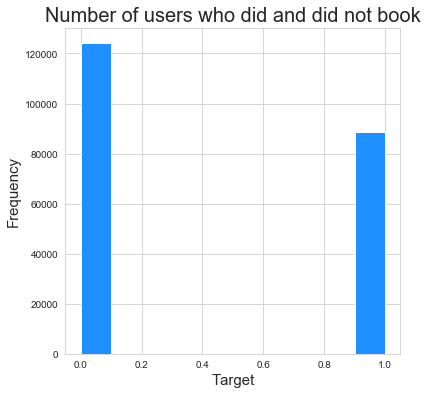

In [53]:
plt.figure(figsize=(6,6))
plt.xlabel('Target', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Number of users who did and did not book',fontsize=20)
plt.hist(df.target,color='dodgerblue',rwidth=5);

As we can see in this histogram, just over XXX users from the dataset did make a booking and around XXX did not. This suggests we have a target class imbalance which might have to be rectified by upsampling.

## Who are AirBnb customers?

Let's now have a look at the data from users who made a booking on the website and compare it with users who did not book. This might help us find indication of what are the important features. 

### AGE

In [54]:
#creating separate datasets for users who did and did not book

#'yes booking = yb'
yb = df.loc[df.target == 1]

#'no booking = nb'
nb = df.loc[df.target == 0]

Median age of users who booked: 34.0
Median age of users who did not book: 34.0


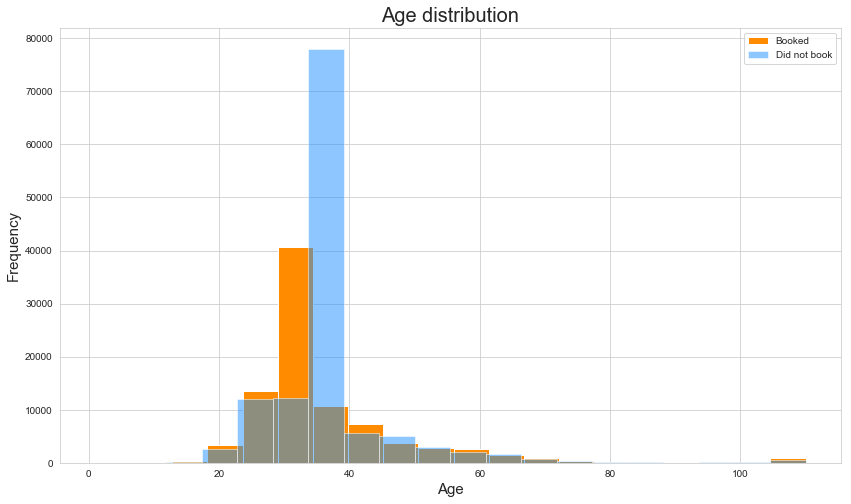

In [55]:
plt.figure(figsize=(14,8))
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Age distribution',fontsize=20)
plt.hist(yb.age,color='darkorange',rwidth=5,alpha=1,label='Booked',bins=20)
plt.hist(nb.age,color='dodgerblue',rwidth=5,alpha=0.5,label='Did not book',bins=20)
plt.legend();

print('Median age of users who booked: '+str(round(yb.age.median(),2)))
print('Median age of users who did not book: '+str(round(nb.age.median(),2)))

* The age of users who did not book is more concentrated around the mean age (it has a strong peak in ages between 35 to 40).
* The peak of users who booked is in the previous bin, but the peak is less strong. 
* Most users are between 25 to 40. Both distributions have positive/right skew. 
* Median for both distributions is almost identical.


### GENDER

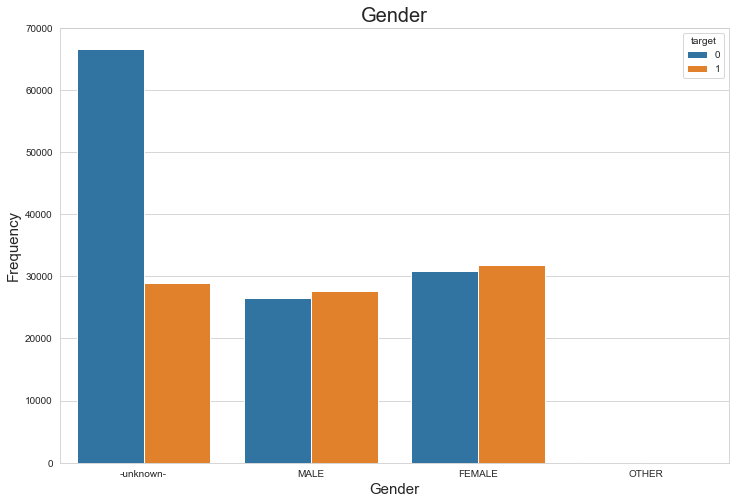

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(x='gender',hue='target',data=df)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Gender',fontsize=20);

* The distribution of gender categories is pretty equal among users who made a booking, just below 10 000 each.
* Users whose gender is unknown were twice as likely not to make a booking compared to other gender categories.
* This seems to be a significant factor for determining a user who will not make a booking. 
* Also, if take into consideration the class imbalance mentioned above, users whose gender we know are generally more likely to make a booking than not!

### Sign-up method

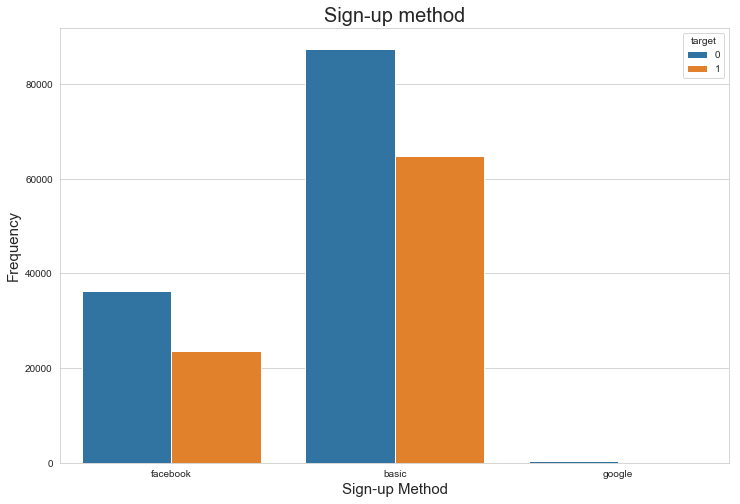

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(x='signup_method',hue='target',data=df)
plt.xlabel('Sign-up Method', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Sign-up method',fontsize=20);

In [58]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,target
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


### When did users create their accounts

In [59]:
dates_ac_created_yb = dict(yb.date_account_created.value_counts())
dates_ac_created_nb = dict(nb.date_account_created.value_counts())

In [60]:
dict_ac_created_yb = dict()

for key in sorted(dates_ac_created_yb.keys()):
    dict_ac_created_yb.update({key:dates_ac_created_yb[key]})

dict_ac_created_nb = dict()

for key in sorted(dates_ac_created_nb.keys()):
    dict_ac_created_nb.update({key:dates_ac_created_nb[key]})

In [61]:
series_ac_created_yb = pd.Series(dict_ac_created_yb)
series_ac_created_nb = pd.Series(dict_ac_created_nb)

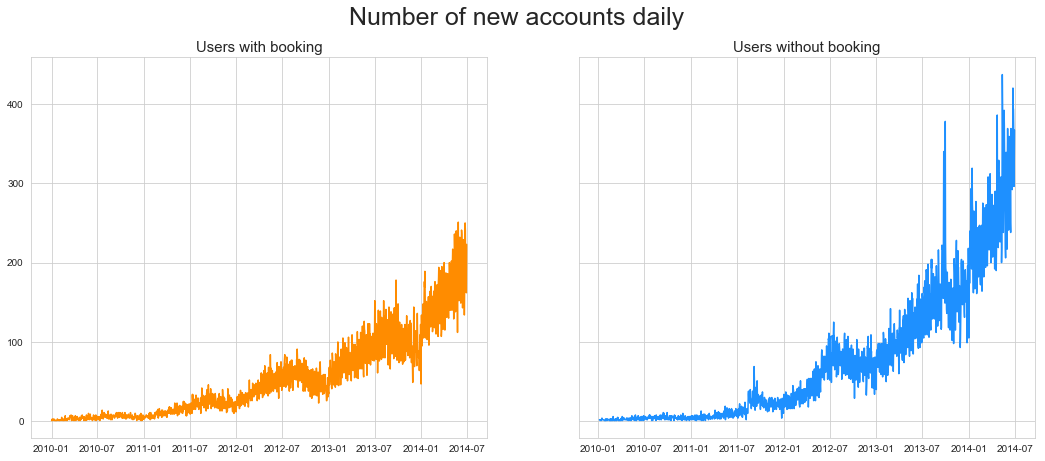

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(18,7), sharey=True)
axs[0].plot(series_ac_created_yb,color='darkorange')
axs[0].set_title('Users with booking',fontsize=15)
axs[1].plot(series_ac_created_nb,color='dodgerblue')
axs[1].set_title('Users without booking',fontsize=15)
fig.suptitle('Number of new accounts daily',fontsize=25);

### First browser

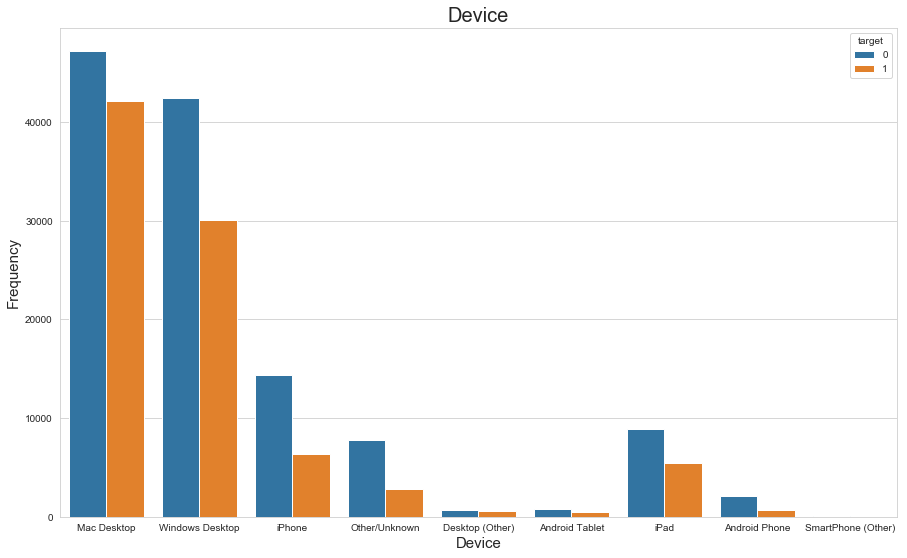

In [63]:
plt.figure(figsize=(15,9))
sns.countplot(x='first_device_type',hue='target',data=df)
plt.xlabel('Device', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Device',fontsize=20);

* By far the most popular devices as Mac and Windows desktop computers.
* Users of Mac Desktop are more likely to make a booking due to a small difference between users who booked it who did not


### Sign-up Flow (the page a user came to signup up from)

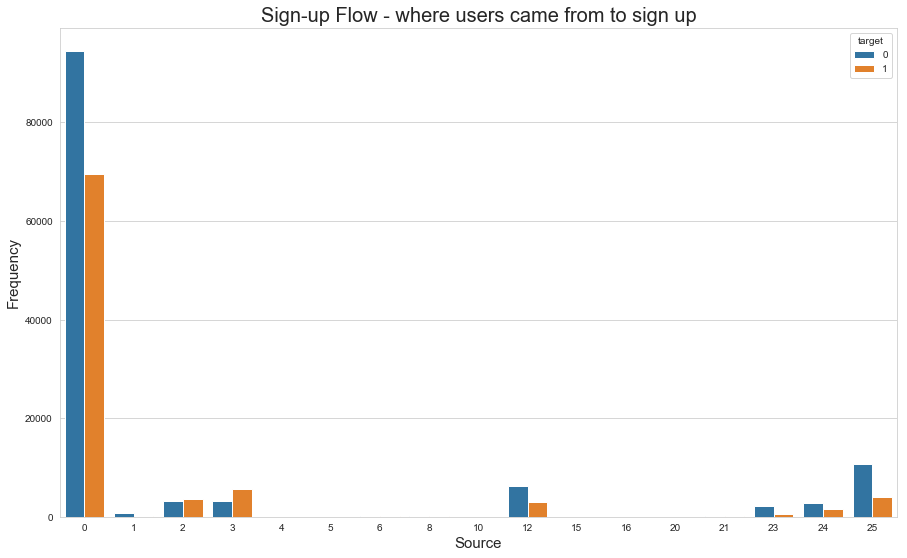

In [64]:
plt.figure(figsize=(15,9))
sns.countplot(x='signup_flow',hue='target',data=df)
plt.xlabel('Source', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Sign-up Flow - where users came from to sign up',fontsize=20);

* Unfortunately we don't know what sources there numbers represent, but most common by far is '0'
* Sources number 2 and 3 are most effective at converting users

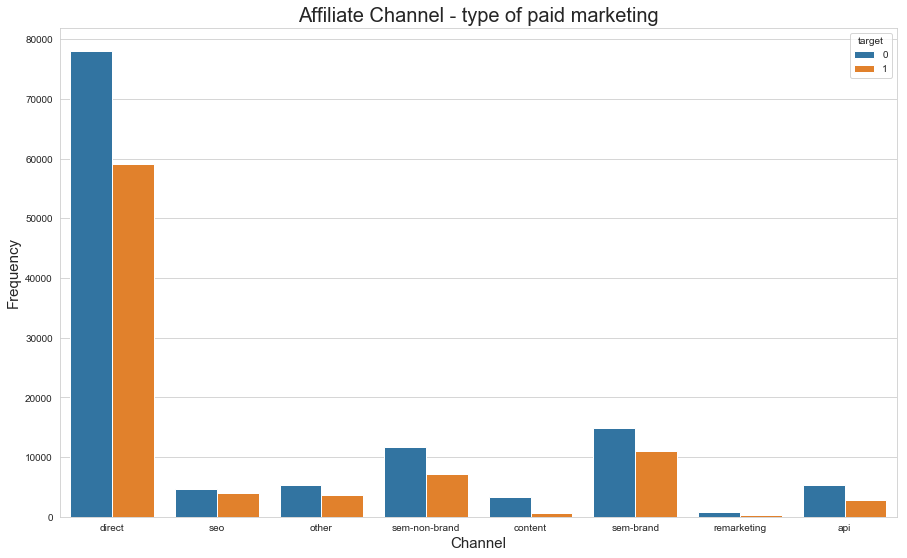

In [67]:
plt.figure(figsize=(15,9))
sns.countplot(x='affiliate_channel',hue='target',data=df)
plt.xlabel('Channel', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Affiliate Channel - type of paid marketing',fontsize=20);

## Fitting first model just for fun (without sessions data)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212650 entries, 0 to 213450
Data columns (total 15 columns):
id                         212650 non-null object
date_account_created       212650 non-null datetime64[ns]
timestamp_first_active     212650 non-null datetime64[ns]
gender                     212650 non-null object
age                        212650 non-null float64
signup_method              212650 non-null object
signup_flow                212650 non-null int64
language                   212650 non-null object
affiliate_channel          212650 non-null object
affiliate_provider         212650 non-null object
first_affiliate_tracked    212650 non-null object
signup_app                 212650 non-null object
first_device_type          212650 non-null object
first_browser              212650 non-null object
target                     212650 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(10)
memory usage: 36.0+ MB


In [79]:
df_dummies = pd.get_dummies(data=df, columns=['gender', 'signup_method','affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app','language',
       'first_device_type', 'first_browser'])

In [80]:
len(df_dummies.columns)

136

In [81]:
#dropping ID columns
df_dummies.drop('id',axis=1, inplace= True)

df_dummies.drop('date_account_created',axis=1, inplace= True)

df_dummies.drop('timestamp_first_active',axis=1, inplace= True)

In [82]:
X = df_dummies.drop('target',axis=1)
y = df_dummies.target

In [83]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [86]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

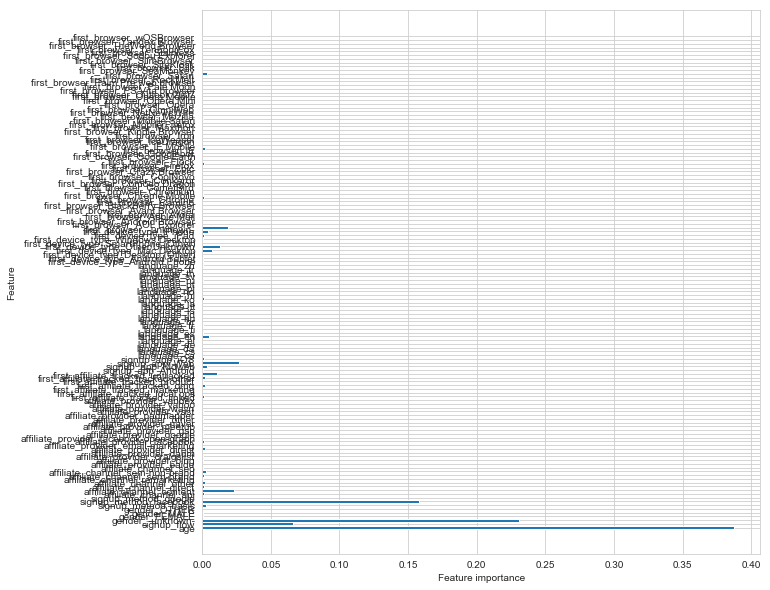

In [87]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [88]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19600  5177]
 [ 7804  9949]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75     24777
           1       0.66      0.56      0.61     17753

   micro avg       0.69      0.69      0.69     42530
   macro avg       0.69      0.68      0.68     42530
weighted avg       0.69      0.69      0.69     42530



In [89]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 69.48%


## Trying random forest



In [ ]:
forest = RandomForestClassifier()

In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [121]:
dt_param_grid = {
    'max_depth': [22,24,26],
    'min_samples_split': [35,40,45],
}

In [122]:
rf_tree = GridSearchCV(forest,dt_param_grid,cv=3)

In [123]:
# Instantiate and fit a RandomForestClassifier
rf_tree.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [22, 24, 26], 'min_samples_split': [35, 40, 45]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
rf_tree.best_params_

{'max_depth': 22, 'min_samples_split': 40}

In [126]:
rf_tree.score(X_train, y_train)

0.7079120620738303

In [127]:
rf_tree.score(X_test, y_test)

0.6897484128850223

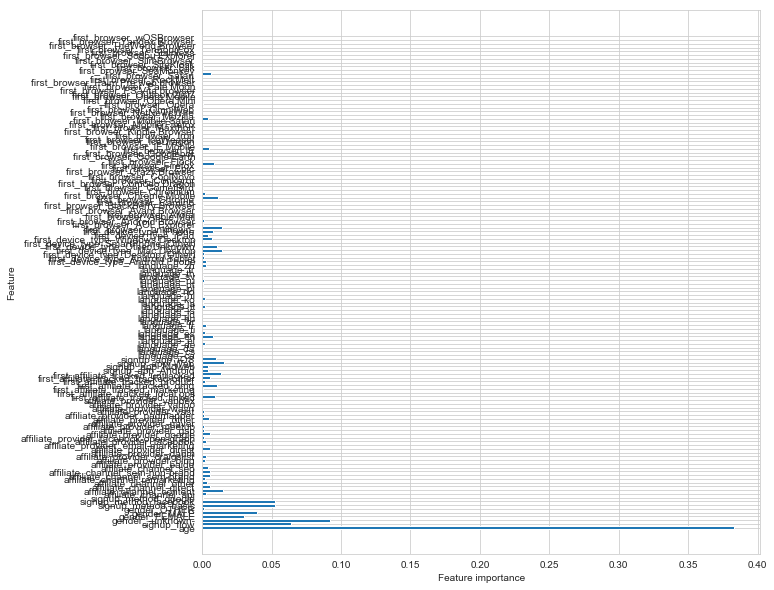

In [93]:
plot_feature_importances(forest)